# Predictive Analytics for US Natural Disaster :- Basic EDA and Visualisation     Presented by : Aniket Sakharkar //                                                                         Goal:- To predict and scrutiny how frequent disasters occurs.



In [5]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
df=pd.read_csv('us_disaster_declarations.csv',header=0)

In [7]:
df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T04:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T04:00:00Z,1953-05-02T04:00:00Z,NaN,13000,0,Statewide,53013,2f28952448e0a666d367ca3f854c81ec,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602bf
1,DR-2-TX,2,TX,DR,1953-05-15T04:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T04:00:00Z,1953-05-15T04:00:00Z,NaN,48000,0,Statewide,53003,c5a1a4a1030d6730d9c562cdbe7c830f,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c3
2,DR-3-LA,3,LA,DR,1953-05-29T04:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T04:00:00Z,1953-05-29T04:00:00Z,NaN,22000,0,Statewide,53005,745948932fd77a7c6dcd4de7059ff080,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c1
3,DR-4-MI,4,MI,DR,1953-06-02T04:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T04:00:00Z,1953-06-02T04:00:00Z,NaN,26000,0,Statewide,53004,8c9dee13124e36a9dfe2eb74e33fafad,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c0
4,DR-5-MT,5,MT,DR,1953-06-06T04:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T04:00:00Z,1953-06-06T04:00:00Z,NaN,30000,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2019-07-26T18:49:32Z,5d1bceafd5b39c032f2602c7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59392 entries, 0 to 59391
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     59392 non-null  object
 1   disaster_number             59392 non-null  int64 
 2   state                       59392 non-null  object
 3   declaration_type            59392 non-null  object
 4   declaration_date            59392 non-null  object
 5   fy_declared                 59392 non-null  int64 
 6   incident_type               59392 non-null  object
 7   declaration_title           59392 non-null  object
 8   ih_program_declared         59392 non-null  int64 
 9   ia_program_declared         59392 non-null  int64 
 10  pa_program_declared         59392 non-null  int64 
 11  hm_program_declared         59392 non-null  int64 
 12  incident_begin_date         59392 non-null  object
 13  incident_end_date           51226 non-null  ob

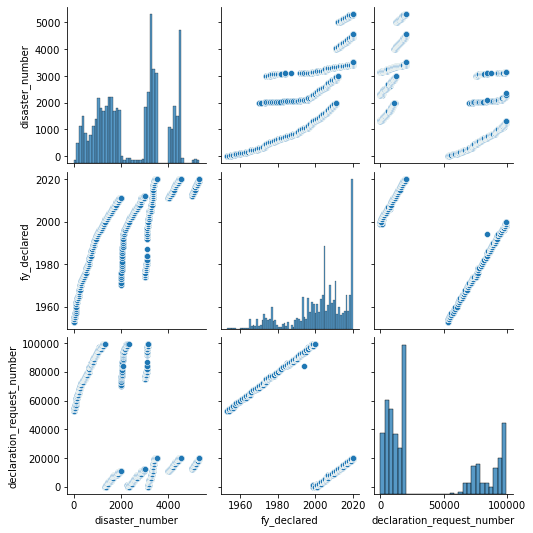

In [10]:
sns.pairplot(df[['disaster_number','fy_declared','incident_type','declaration_request_number']]);

# How frequently do disasters occur statewide

In [12]:
disaster_types = df['incident_type'].unique()
print("Types of Disasters reported:\n\n", disaster_types)
print("Occurrences:\n\n",df['incident_type'].value_counts())

Types of Disasters reported:

 ['Tornado' 'Flood' 'Fire' 'Other' 'Earthquake' 'Hurricane' 'Volcano'
 'Severe Storm(s)' 'Toxic Substances' 'Typhoon' 'Drought'
 'Dam/Levee Break' 'Snow' 'Severe Ice Storm' 'Freezing' 'Coastal Storm'
 'Fishing Losses' 'Mud/Landslide' 'Human Cause' 'Terrorist' 'Tsunami'
 'Chemical' 'Biological']
Occurrences:

 Severe Storm(s)     17032
Hurricane           10880
Flood               10395
Biological           7645
Snow                 3659
Fire                 3334
Severe Ice Storm     1990
Tornado              1463
Drought              1292
Coastal Storm         572
Freezing              301
Other                 297
Earthquake            226
Typhoon               130
Volcano                51
Fishing Losses         42
Mud/Landslide          31
Dam/Levee Break        13
Tsunami                 9
Toxic Substances        9
Chemical                9
Human Cause             7
Terrorist               5
Name: incident_type, dtype: int64


C:\Users\91816\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


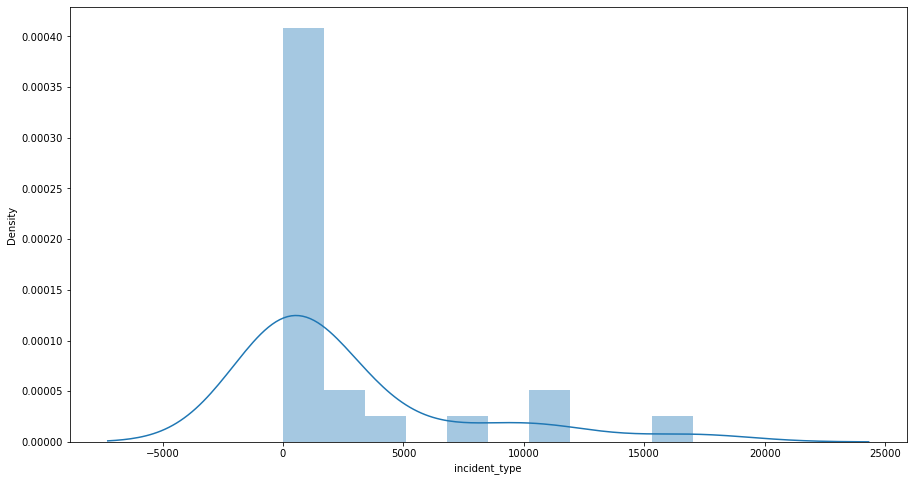

In [16]:
plt.pyplot.figure(figsize=(15,8))
sns.distplot(df['incident_type'].value_counts());

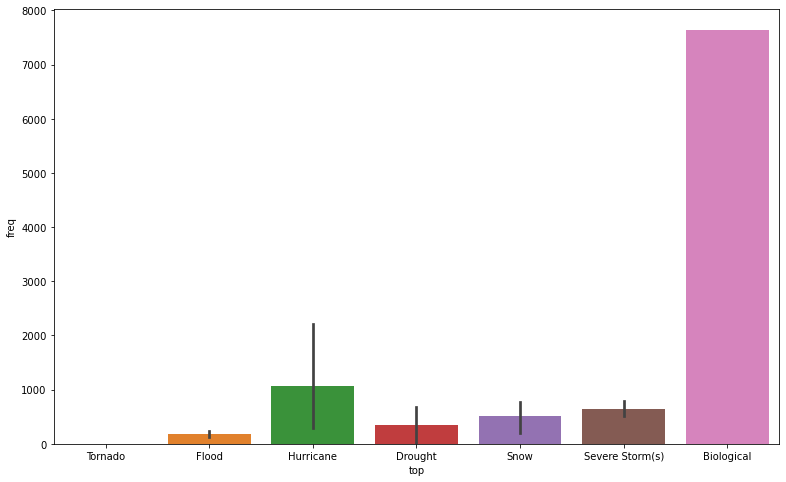

In [23]:
m=df[['fy_declared','incident_type']].groupby('fy_declared').describe()['incident_type'].reset_index()
plt.pyplot.figure(figsize=(13,8))
sns.barplot(x='top',y='freq',data =m);


In [35]:
m=df['fy_declared'].value_counts().reset_index()

In [36]:
m.head(10)

,index,fy_declared
0,2020,8410
1,2005,4661
2,2011,2684
3,2008,2456
4,2019,1916
5,2017,1905
6,2004,1894
7,1993,1773
8,1996,1750
9,2003,1662


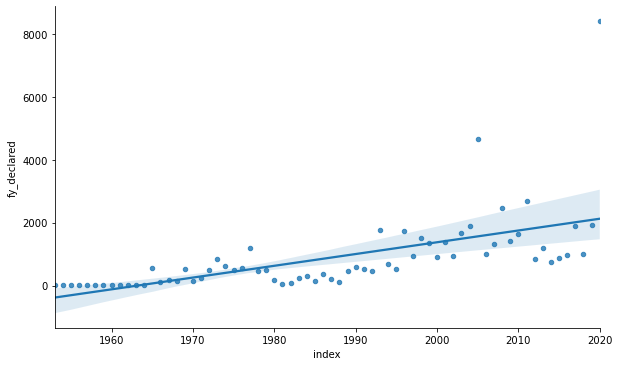

In [37]:
sns.lmplot(x='index',y='fy_declared',data=m.sort_values(by='fy_declared'),
           aspect=1.7, height=5,markers=['o'], scatter_kws={'s':20});

# To check which states are prone to what kinds of Natural Disasters

In [42]:
m=df[['state','incident_type']].groupby('state').describe()
m['incident_type'].sort_values(by='count',ascending=False).head(10)

,count,unique,top,freq
state,,,,
TX,4561,11,Fire,1216
MO,2767,8,Severe Storm(s),1406
VA,2460,10,Hurricane,877
KY,2417,10,Severe Storm(s),987
OK,2279,9,Severe Storm(s),997
GA,2240,10,Hurricane,884
FL,1969,10,Hurricane,930
NC,1848,10,Hurricane,1075
IA,1800,8,Flood,722


# Plotting count, unique and frequency from describe() function

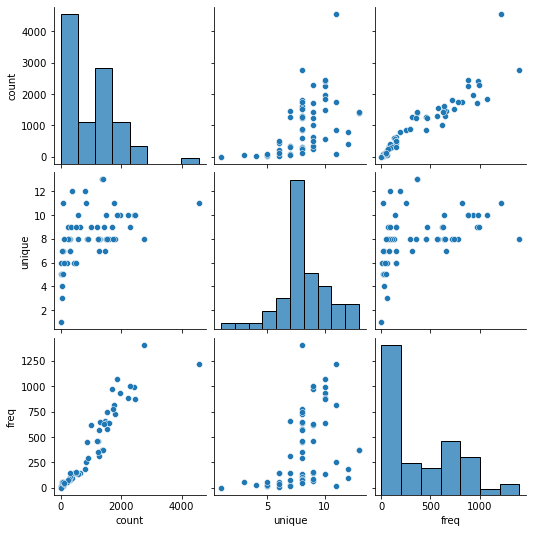

In [44]:
m=df[['state','incident_type']].groupby('state').describe()
sns.pairplot(m['incident_type'].reset_index(drop=True));

In [46]:
m['incident_type'].sort_values(by='freq',ascending=False)['freq'].head(10)

state
MO    1406
TX    1216
NC    1075
OK     997
KY     987
KS     975
FL     930
GA     884
VA     877
LA     818
Name: freq, dtype: object

# States at Maximum Risk

In [48]:
p = df[['state','incident_type']].groupby('state').count()
p.reset_index(inplace=True)
p=p.sort_values(by='incident_type',ascending=False).head(10)
p

,state,incident_type
50,TX,4561
28,MO,2767
52,VA,2460
20,KY,2417
41,OK,2279
12,GA,2240
10,FL,1969
32,NC,1848
15,IA,1800
21,LA,1751


# Plotting All cases reported of natural disasters per state

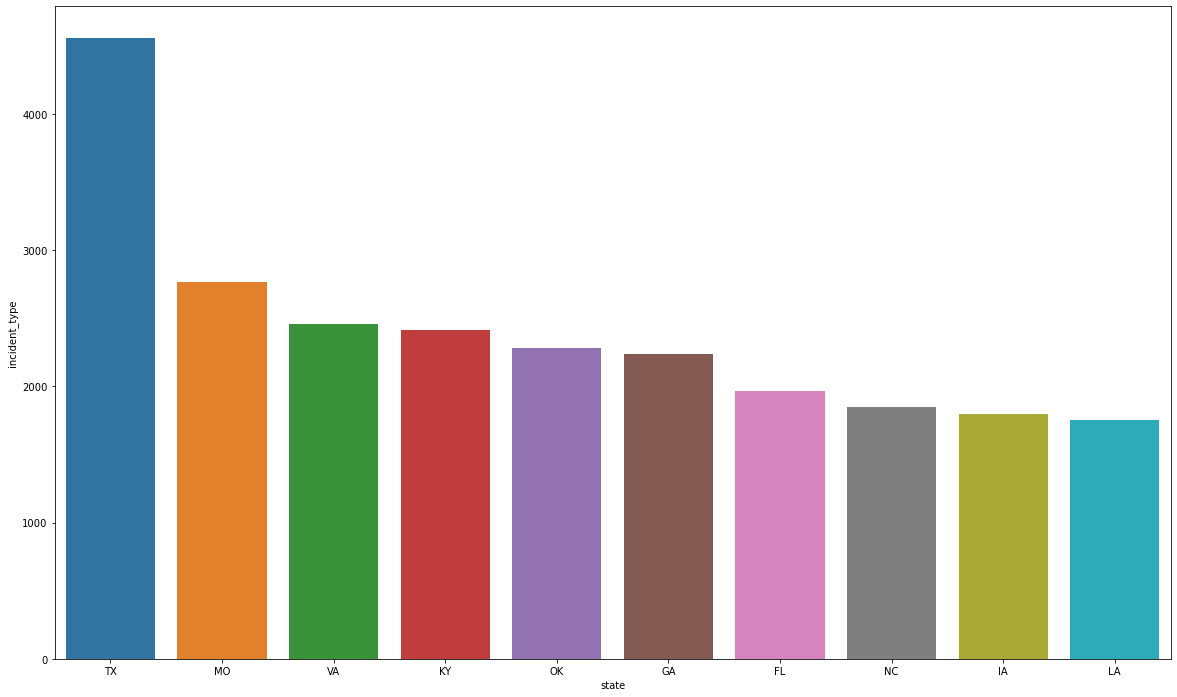

In [51]:
plt.pyplot.figure(figsize=(20,12))
sns.barplot(x="state", y="incident_type", data=p,);

# Texas TX seems to be the most disaster Prone state and Los Angeles seems to be the least disaster prone state Lets find out more:

In [53]:
print("Texas mostly faces:\n")
df[['state','incident_type']].groupby('state').max().loc['TX']

Texas mostly faces:



incident_type    Tornado
Name: TX, dtype: object

# Texas reports over time:

In [54]:
m=df.query('state=="TX"')['fy_declared'].value_counts().reset_index()
m.head(10)

,index,fy_declared
0,2005,763
1,2020,525
2,2008,476
3,1999,297
4,1998,293
5,2006,277
6,2011,261
7,2016,168
8,1993,153
9,2007,116


# 2005 and 2020 were the worst years, most of the natural disasters reported were in these times. Interestingly the rate of natural disasters in TX has increased almost proportionally with time. Plotted Below:

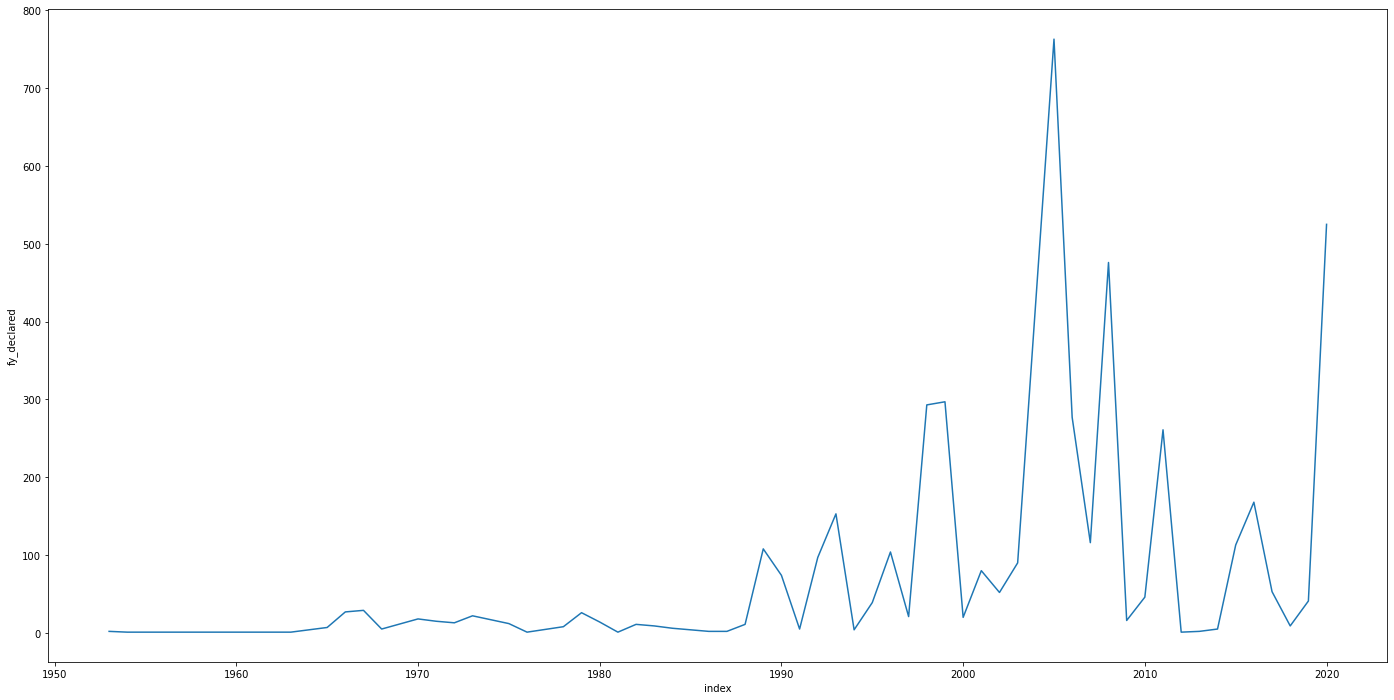

In [58]:
plt.pyplot.figure(figsize=(24,12))
sns.lineplot(x='index',y='fy_declared',data=m.sort_values(by='fy_declared'));

# What is the reason of such a huge number of reports in 2020¶

In [59]:
df.query('state == "TX" & fy_declared=="2020"')['incident_type'].unique()

array(['Flood', 'Biological'], dtype=object)

# What are the most disaster prone designated areas?

In [61]:
print("Total Areas\n",df['designated_area'].nunique())

Total Areas
 2766


In [62]:
df[['designated_area','incident_type']].groupby('designated_area').count().sort_values(by='incident_type',ascending=False).head(10)

,incident_type
designated_area,
Statewide,511
Washington (County),508
Jefferson (County),462
Jackson (County),440
Franklin (County),437
Lincoln (County),394
Montgomery (County),349
Clay (County),346
Madison (County),334


# From this we can see that TX as a state has encountered maximum natural disasters but the designated area -- Washington County that has encountered maximum natural disasters is not in TX.

# Looking at the dates on which maximum Statewide Disasters were reported:

In [10]:
d = pd.to_datetime(df['declaration_date']).dt
df['year'] = d.year
df['month'] = d.month
df['day'] = d.day
df['time'] = d.time
del df['declaration_date']

In [64]:
df['declaration_type'].value_counts()

DR    40820
EM    16882
FM     1690
Name: declaration_type, dtype: int64

In [68]:
df[['year','month','day','declaration_type']].groupby(['year','month','day']).describe()

declaration_type                
                          count unique top freq
year month day                                 
1953 5     2                  1      1  DR    1
           15                 1      1  DR    1
           29                 1      1  DR    1
     6     2                  1      1  DR    1
           6                  1      1  DR    1
...                         ...    ...  ..  ...
2020 7     10               192      1  DR  192
           12                 1      1  FM    1
           14                 1      1  FM    1
           22                 1      1  FM    1
           25                 4      1  EM    4

[3067 rows x 4 columns]

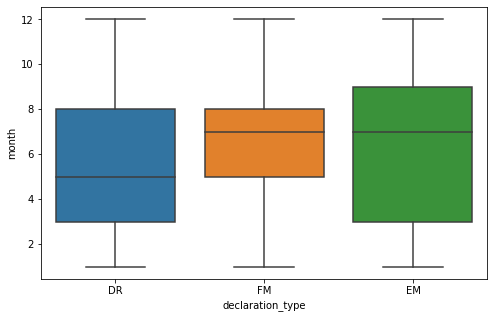

In [72]:
m=df[['month','declaration_type']]
plt.pyplot.figure(figsize=(8,5))
sns.boxplot(x='declaration_type',y='month',data=m);

<AxesSubplot:xlabel='index', ylabel='declaration_type'>

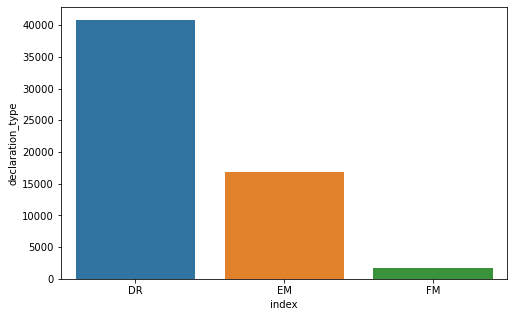

In [85]:
plt.pyplot.figure(figsize=(8,5))
sns.barplot(x='index',y='declaration_type',data=df['declaration_type'].value_counts().reset_index())

# Some Date-wise observations

In [81]:
m=df[['year','month','day','time','declaration_type']].groupby(['year','month','day','time']).count()
m.reset_index().sort_values(by='declaration_type',ascending=False)

,year,month,day,time,declaration_type
3661,2020,3,13,20:00:00,2893
3660,2020,3,13,19:00:00,568
1052,1996,1,13,05:00:00,453
3706,2020,4,4,17:15:00,437
1944,2005,9,13,17:34:00,433
...,...,...,...,...,...
1584,2002,5,29,18:30:00,1
1585,2002,6,1,22:30:00,1
2771,2011,8,31,01:55:00,1
2770,2011,8,31,00:05:00,1


3661 disasters were reported on 2020-03-13. Lets break up the date time features to make some new features. And let's see what happened on 13/03/20,13/01/1996,04/04/2020,11/9/2005

In [82]:
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(2020,3,13))['declaration_title'].value_counts()

Covid-19    3703
Name: declaration_title, dtype: int64

It seems like the maximum number of reports ever was on 13/03/2020 and the reason was obviously COVID-19 outbreak. Let's plot the number of corona reports in 2020 per state

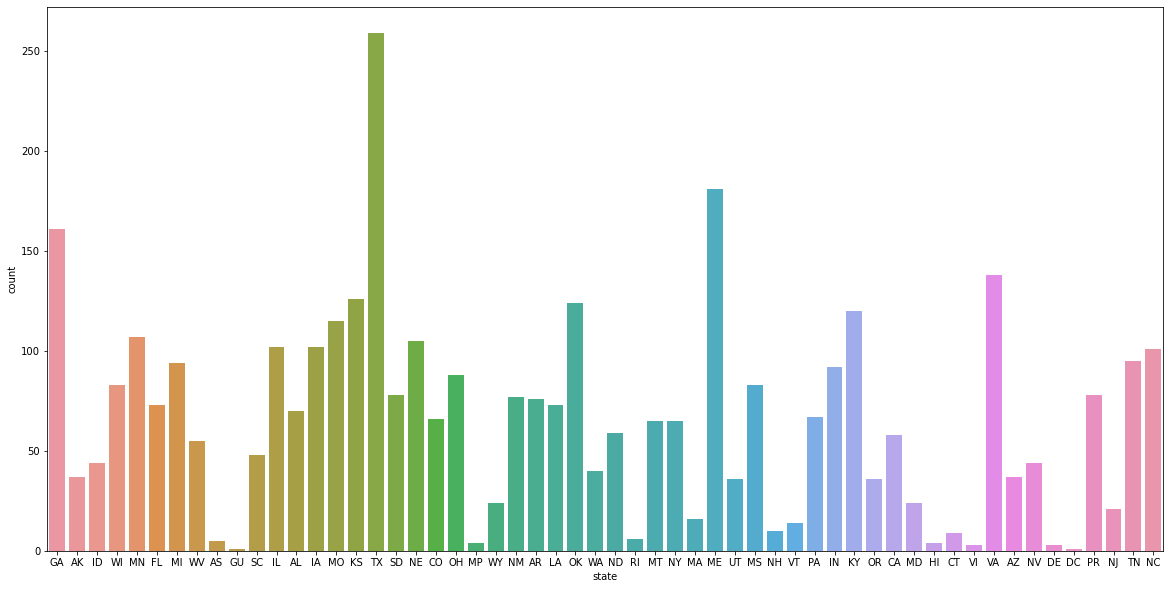

In [83]:
m = df.query('year=="{0}" & declaration_title=="Covid-19"'.format(2020))
plt.pyplot.figure(figsize=(20,10))
sns.countplot(x='state',data=m.sort_values(by='time'));

In [86]:
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(1996,1,13))['declaration_title'].unique()

array(['Blizzard Of 96 (Severe Snow Storm)', 'Blizzard Of 96'],
      dtype=object)

In [87]:
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(2020,4,4))['declaration_title'].unique()

array(['Covid-19 Pandemic'], dtype=object)

In [89]:
m=df.query('year=="{0}" & month=="{1}"'.format(2005,9))
m['declaration_title'].value_counts()

Hurricane Katrina Evacuation    2602
Hurricane Rita                   637
Hurricane Katrina                231
Hurricane Katrina Evacuees        93
Hurricane Ophelia                 37
Tropical Storm Rita                4
Topanga Fire                       2
Sundevil Fire                      1
Name: declaration_title, dtype: int64

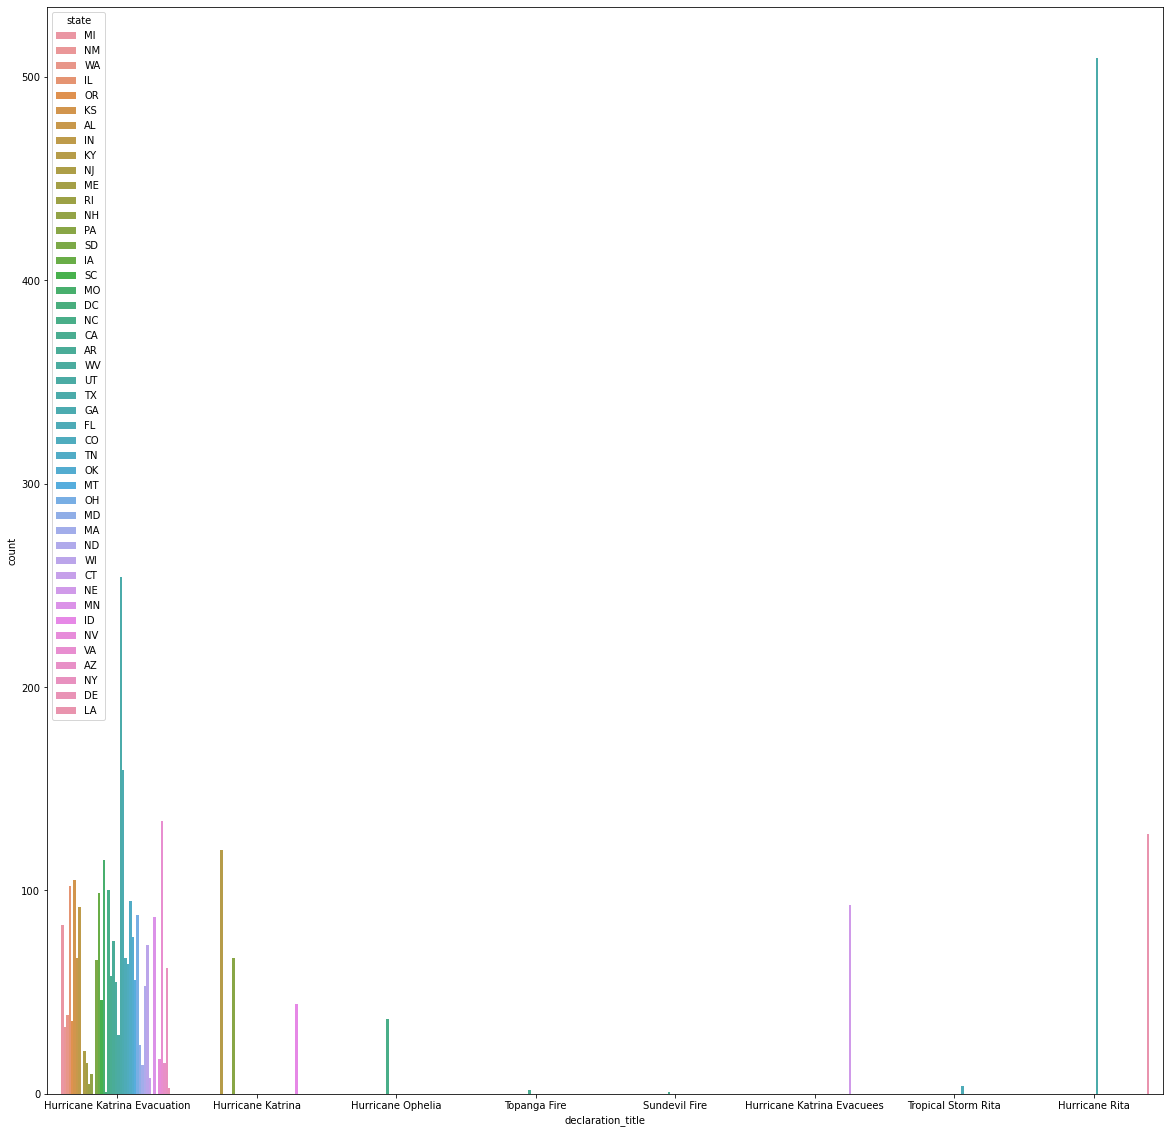

In [93]:
plt.pyplot.figure(figsize=(20,20))
sns.countplot(x='declaration_title',data=m.sort_values(by='time'),hue='state');

This is clear that all reported causes in 1996 were because of the blizzard of '96, and in 2020 major causes are flood and Covid 19 In september 2005 However 3 hurricanes, and 2 tropical fires were the reason

# Let's get some insight into reports for which individual assistance or housing was not provided

In [12]:
m = df.query('ia_program_declared == "0" & ih_program_declared == "0" & pa_program_declared =="0"')
m['incident_type'].value_counts()

Severe Storm(s)     547
Hurricane            18
Severe Ice Storm      4
Biological            2
Coastal Storm         1
Fire                  1
Flood                 1
Name: incident_type, dtype: int64

These people were not provided individual assistance or any of the programs to be helped though they reported calamities, assuming they were ignored for reasons out of our analysis scope

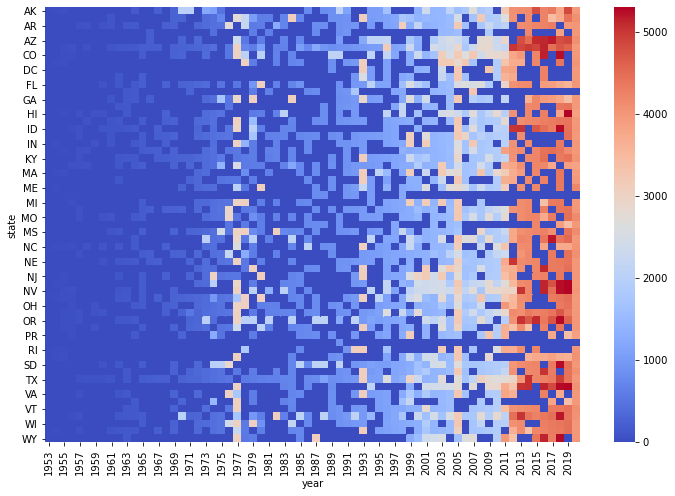

In [11]:
pt = df.pivot_table(values ='disaster_number', index = 'state', columns = 'year').fillna(0)
plt.pyplot.figure(figsize=(12,8))
sns.heatmap(pt, cmap='coolwarm');
plt.pyplot.savefig('heatmap.png')